# TSF Task 1

Submitted By Devi Parvati Chitra

# Prediction Using Supervised ML

# Predict the Percentage of a score earned by a student based on the number of hours studied


In [1]:
#Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:

# Load data
data_url = "http://bit.ly/w-data"
df = pd.read_csv(data_url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Check data for errors and null values
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#Check if data for null value
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Plot Data

<AxesSubplot:xlabel='Hours'>

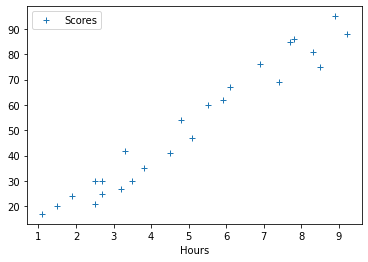

In [5]:
df.plot(x='Hours', y='Scores', style='+')  


In [6]:
#Run correlation
correl= df.corr(method='pearson')
print (correl)
#sns.heatmap(correl)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


# Train model

In [7]:
#spliting data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [8]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)


In [9]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

In [10]:
# Plotting the regression line

reg_line= model.coef_*X+model.intercept_

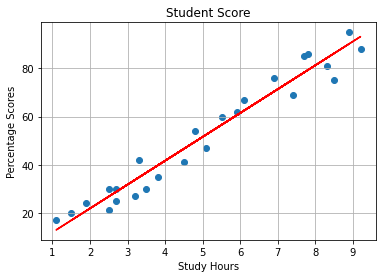

In [11]:
plt.scatter(X, y)
plt.plot(X, reg_line, color='red');
plt.title("Student Score")
plt.xlabel("Study Hours")
plt.ylabel("Percentage Scores")
plt.grid()
plt.show()

In [12]:
#Testing data
print(X_test)
# Model Prediction 
y_pred = model.predict(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Now the Predictions..

In [13]:
# Comparing Actual vs Predicted

new_df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
new_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
print("Training Score:",model.score(X_train,y_train))
print("Test Score:",model.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


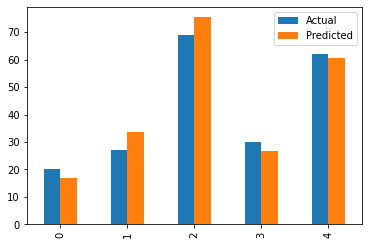

In [15]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

new_df.plot(kind='bar')
plt.show()

#  Now the Predicted Score if the student studies 9.25hr/day

In [16]:
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


#  Evaluating the model



The final step is to evaluate the performance of the model

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [18]:
me_err = mean_absolute_error(y_test, y_pred)
ms_err = mean_squared_error(y_test, y_pred)
rootmserr = np.sqrt(ms_err)

In [19]:
print(f'Mean absolute error: {me_err:.2f}')
print(f'Mean squared error: {ms_err:.2f}')
print(f'Root mean squared error: {rootmserr:.2f}')
print('R-2:', r2_score( y_pred,y_test))



Mean absolute error: 4.18
Mean squared error: 21.60
Root mean squared error: 4.65
R-2: 0.9546785947197246


The value of R2,0.9546785947197246, indicates the model is more that 95% accurate.

# Thank you